<center>

# EE2703 - Assignment 6

## Name : ANIRUDH B S
## Roll No : EE21B019
</center>

# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

In [1]:
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as wdg
%matplotlib ipympl

### Assumptions :
The above mentioned packages are installed and ready to be used. If not available, kindly install them 

## One Dimensional Gradient Descent
The below cell implements the one dimensional gradient descent. 

The approach for gradient descent in one dimension is described below - 

<center>
    $x_{new}$ = $x_{old}$ - $\alpha$ * $\frac{df}{dx}$
</center>

where $\alpha$ is the learning rate. 

The main assumption in this is that gradient descent always moves in the direction of the minima, that is the cost always goes on decreasing. This is true in general as $\frac{df}{dx}$ gives the direction of the gradient at each point and thus x always moves towards the minima provided the learning rate is optimal. 

xlim represents the bounds on x, that is the interval in which the optimal solution needs to be found. 

Learning rate should not be too less as it leads to slower convergence and it should not be too high as well as it might lead to oscillations or instability (divergence of x). 

The stopping criterion for gradient descent being that as error (here, relative error = abs($x_{new}$ - $x_{old}$) ) goes below a certain threshold $\epsilon$, which can be set by the user (default value being $10^{-6}$), we have reached close enough of the needed value. 

The maximum number of iterations can also be set by the user (default value = $10^{6}$) is set to provide a bound on the maximum time permitted to get an output. 

The gradientdescent() function is implemented as described in the problem statement file - that is to take f and fprime as inputs and take xlim also as inputs. In addition, two more degrees of freedom, in accordance with the presentation file, x0 and learning_rate have been added to enhance interactability with the user

In [2]:
def gradientdescent(f, fprime, xlim, xo, learning_rate, tolerance = 1e-6, itermax = 1e6) :
    x = xo                                        #Get Initial starting point
    for i in range(int(itermax)): 
        xnew = x - learning_rate * fprime(x)     #Forward Propagation using Gradient Descent
        if xlim[0] < xnew and xnew < xlim[1]:    #Check if x is in range if not then return the previous value
            if abs(xnew - x) < tolerance :           #If error less than tolerance break
                break                                #else run again till itermax 
            x = xnew
        else :
            return x, f(x)
    return x, f(x)

The below cell implements it the way the presentation file asks it to be implemented.

In [3]:
def gradientdescent1D(f, fprime, xo, learning_rate, tolerance = 1e-6, itermax = 1e6) :
    x = xo                                       #Initial starting point
    for i in range(int(itermax)): 
        xnew = x - learning_rate * fprime(x)     #Forward Propagation using Gradient Descent
        if abs(xnew - x) < tolerance :           #If error less than tolerance break
            break                                #else run again till itermax 
        x = xnew
    return x, f(x)                               #Return xmin and f(xmin)

## Gradient Descent in Multiple Dimensions
The approach for gradient descent in multiple dimension is described below - 

<center>
    $\overrightarrow{x_{new}}$ = $\overrightarrow{x_{old}}$ - $\alpha$ * $\nabla f$
</center>

where $\alpha$ is the learning rate. 

The main assumption in this is that gradient descent always moves in the direction of the minima, that is the cost always goes on decreasing. This is true in general as $\nabla f$ gives the direction of the gradient at each point and thus $\overrightarrow{x}$ always moves towards the minima provided the learning rate is optimal. 

Learning rate should not be too less as it leads to slower convergence and it should not be too high as well as it might lead to oscillations or instability (divergence of $\overrightarrow{x}$). 

The stopping criterion for gradient descent being that as error (here, relative error = ||($\overrightarrow{x_{new}}$ - $\overrightarrow{x_{old}}$)|| ) goes below a certain threshold $\epsilon$, which can be set by the user (default value being $10^{-6}$), we have reached close enough of the needed value. 

The maximum number of iterations can also be set by the user (default value = $10^{6}$) is set to provide a bound on the maximum time permitted to get an output. 

**The only difference in gradient descent in multiple dimension from one dimension is that each x which originally was a scalar, is now a vector (a python list).** Numpy supports vectorized operations as in each vectorized operation runs highly efficiently and consumes less time due to parallel operation of each component. This is one of the reasons machine learning mostly involves Python than C or C++ which are faster otherwise.

Note : Two implementations of gradient descent are given. The nDgradient descent takes in the above mentioned parameters as asked in the presentation document. The 2D gradient descent is described below the following cell.

In [4]:
def nDgradientdescent(f, fprime, xo, learning_rate, tolerance = 1e-6, itermax = 1e6):
    x = np.array(xo)                                #Initial starting point
    for i in range(int(itermax)):
        xnew = x - learning_rate * fprime(x)        #Forward propagation using Gradient Descent 
        if np.linalg.norm(xnew - x) < tolerance :   #If error less than tolerance then break
            break                                   #else run again until itermax
        x = xnew                                    #Update x 
    return x, f(x)                                  #Return xmin and f(xmin)
#Note : x here is generalisation of a n-D list 

### About gradientdescent2D
This function takes in 7 parameters and two auxillary parameters. <br>

f - function to be optimized <br>
fprimex - partial derivative of f along x <br>
fprimey - partial derivative of f along y <br>
x0 - intial guess of minima <br>
xlim - bounds on x <br>
ylim - bounds on y <br>
learning_rate - learning rate of gradient descent <br>
tolerance - acceptable error (optional) <br>
itermax - maximum permissible iterations (optional)<br>

This is in accordance with the Problem definition file. However, additional parameters such as x0 and learning_rate have been added to increase the degree of freedom of the function and enhance interactivity with the user.  <br>
I shall be using this function to solve the 2D problems provided. 

In [5]:
def gradientdescent2D(f, fprimex, fprimey, x0, xlim, ylim, learning_rate, tolerance = 1e-6, itermax = 1e6):
    x = x0[0]
    y = x0[1]
    for i in range(int(itermax)):
        xnew = x - learning_rate * fprimex(x, y)       #Forward propagation using Gradient Descent 
        ynew = y - learning_rate * fprimey(x, y)
        if xlim[0] < xnew and x < xlim[1] and ylim[0] < y and y < ylim[1] :
            if np.sqrt(np.power((xnew - x),2)+ np.power((ynew- y),2)) < tolerance :   #If error less than tolerance then break
                break                                   #else run again until itermax
            x = xnew
            y = ynew
        else : 
            return [x,y], f(x,y)
    return [x,y], f(x,y)

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [6]:
def f1(x):                       #Function definition
    return x ** 2 + 3 * x + 8

def fprime1(x):                 #Derivative definition
    return 2*x + 3

xlim1 = [-5,5]                  #Set limits
x01 = 5                         #Set the initial starting point
lr1 = 0.1                       #Set the learning rate

x1, y1 = gradientdescent(f1, fprime1, xlim1, x01, lr1) #Get optimum point (x1,y1)

In [7]:
print(f"The function is having a minima at x = {x1} and its value is y = {y1}") #Print Result

The function is having a minima at x = -1.499995919883872 and its value is y = 5.750000000016648


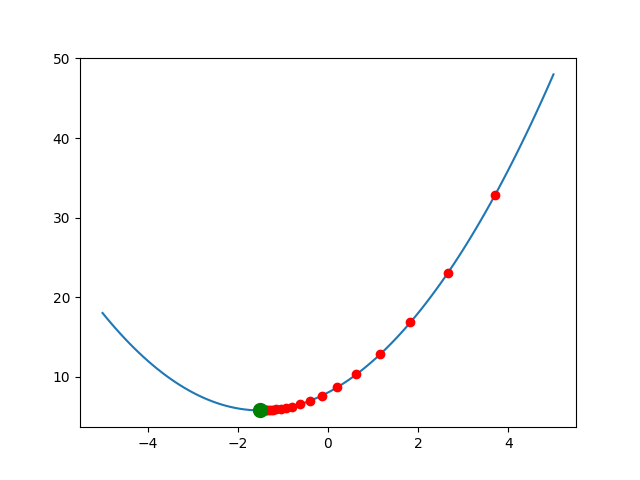

In [8]:
xbase1 = np.linspace(-5,5, 100)                   #Get x values
ybase1 = f1(xbase1)                               #Get y values
fig1, ax1 = plt.subplots()                        #Figure and axis for problem 1
ax1.plot(xbase1, ybase1)                          #Plot graph of f1(x)
xall, yall = [], []
lnall,  = ax1.plot([], [], 'ro')                  #Plot points visited
lngood, = ax1.plot([], [], 'go', markersize=10)   #Plot minimum point attained till now
bestx = x01                                       #Initial bestx
bestcost = f1(x01)                                #Initial bestcost

def problem1(frame):
    global bestcost, bestx, lr1
    x = bestx - fprime1(bestx) * lr1              #1D Gradient Descent
    bestx = x                                     #Update x
    y = f1(x)                                     #Update y
    lngood.set_data(x, y)                         #Set current point in green
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)                    #Mark all the visited points in red
    return lngood,

ani1= FuncAnimation(fig1, problem1, frames=range(100), interval=1000, repeat=False) #Animation
writervideo = animation.FFMpegWriter(fps=60) #To save the video 
ani1.save('Problem1.mp4', writer=writervideo) #Video of the Gradient Descent Approach
plt.show() #Show the plot

### Additional : Widgets to show effect of xo and learning_rate on gradient descent
The below cell shows the effect of learning_rate and xo on the gradient descent algorithm

In [9]:
wdg.interact(gradientdescent, f = wdg.fixed(f1), fprime = wdg.fixed(fprime1), xlim = wdg.fixed(xlim1), xo = wdg.FloatSlider(min = xlim1[0], max = xlim1[1], step = 0.01), learning_rate = wdg.FloatSlider(min = 0, max = 1, step = 0.01))

interactive(children=(FloatSlider(value=0.0, description='xo', max=5.0, min=-5.0, step=0.01), FloatSlider(valu…

<function __main__.gradientdescent(f, fprime, xlim, xo, learning_rate, tolerance=1e-06, itermax=1000000.0)>

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [10]:
xlim2 =  [-10, 10]    #Set x limits
ylim2 =  [-10, 10]    #Set y limits

def f2(x, y):         #Function definition
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262
 
def df2_dx(x, y):     #Partial derivative along x definiton
    return 4*x**3 - 48*x**2 + 192*x - 256

def df2_dy(x, y):     #Partial derivative along y definiton
    return 2*y - 4

x02 = [6, 3]          #Set initial starting point  
lr2 = 0.1             #Set learning rate

x2,y2 = gradientdescent2D(f2, df2_dx, df2_dy, x02, xlim2, ylim2,  lr2) #Get optimal solution 

In [11]:
print(f"The function is having a minima at x = {x2[0]}, y = {x2[1]} and its value is z = {y2}") #Print

The function is having a minima at x = 3.986428205726839, y = 2.000000000000001 and its value is z = 2.000000033927222


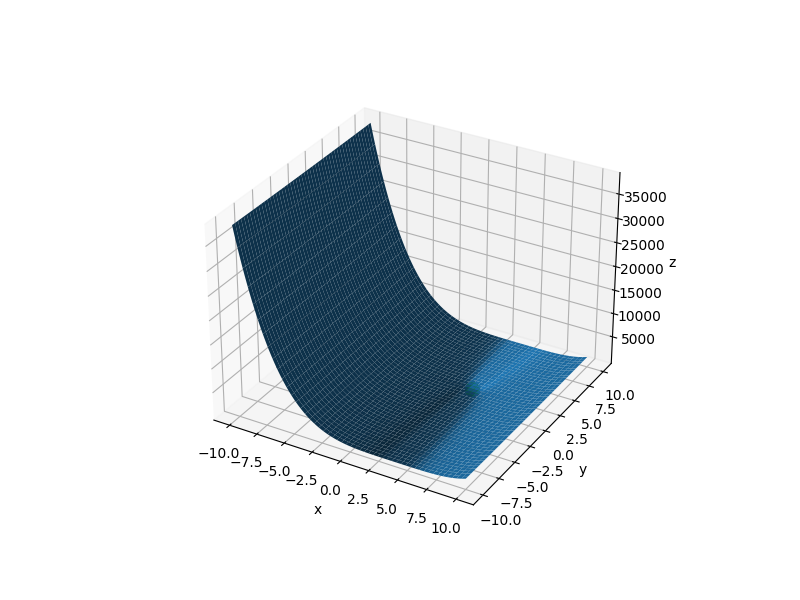

In [13]:
fig2 = plt.figure(figsize = (8,6))           #Created figure
ax2 = fig2.add_subplot(projection = '3d')    #Created 3d axis
x = np.linspace(xlim2[0],xlim2[1],500)       #Created 500 x points
y = np.linspace(ylim2[0],ylim2[1],500)       #Created 500 y points
X, Y = np.meshgrid(x,y)                      #Created mesh having 100 x points and 100 y points X and Y have 100 * 100 points now
Z = np.zeros((500, 500))                     #Create output matrix Z
for i in range(len(x)) :
    for j in range(len(y)) :
        Z[i][j] = f2(X[i][j], Y[i][j])        #Set values of Z 
ax2.set_xlabel('x')                           #Set x axis name
ax2.set_ylabel('y')                           #Set y axis name
ax2.set_zlabel('z')                           #Set z axis name
ax2.plot_surface(X,Y,Z)                       #Plots surface Z = f(X,Y)
xall, yall, zall = [], [], []
lnall,  = ax2.plot([], [], [], 'ro')          #Plots the points that have been checked in red dot
lngood, = ax2.plot([], [], [], 'go', markersize=10) #Plots the current point being checked in green dot

def problem2(frame):
    global x02, lr2                           #Load the inital starting point and learning rate              
    xold = np.array(x02)
    xnew = xold - lr2 * np.array([df2_dx(xold[0],xold[1]), df2_dy(xold[0],xold[1])])#Forward Propagation using Gradient Descent           
    x02 = xnew   #Update next start point
    if xnew[0] >= xlim2[0] and xnew[0] <= xlim2[1] and xnew[1] >= ylim2[0] and xnew[1] <=ylim2[1]:
        xall.append(xnew[0])
        yall.append(xnew[1])
        zall.append(f2(xnew[0], xnew[1]))
        lnall.set_data_3d(xall, yall, zall)     #Plot the red point
        lngood.set_data_3d(xnew[0], xnew[1], f2(xnew[0], xnew[1])) #Plot the green point
        return lngood,

ani2= FuncAnimation(fig2, problem2, frames=range(100), interval=100, repeat=False)
writervideo = animation.FFMpegWriter(fps=60) #To save the video 
ani2.save('Problem2.mp4', writer=writervideo) #Video of the Gradient Descent Approach
plt.show()

### Additional : Use of widgets to show effect of learning rate
The below cell shows how widgets could be used to show the effect of learning rate on gradient descent in 2D

In [15]:
wdg.interact(gradientdescent2D,f= wdg.fixed(f2), fprimex = wdg.fixed(df2_dx), fprimey = wdg.fixed(df2_dy), x0 = wdg.fixed(x02), xlim = wdg.fixed(xlim2), ylim = wdg.fixed(ylim2), learning_rate = wdg.FloatSlider(min=0, max = 1, step = 0.01) )

interactive(children=(FloatSlider(value=0.0, description='learning_rate', max=1.0, step=0.01), FloatSlider(val…

<function __main__.gradientdescent2D(f, fprimex, fprimey, x0, xlim, ylim, learning_rate, tolerance=1e-06, itermax=1000000.0)>

## Problem 3 - 2-D function 

Derivatives and limits given. 

In [14]:
xlim3 = [-pi, pi]     #Set the xlimits, note y limits not given

def f3(x,y):          #Function definition
    return exp(-(x - y)**2)*sin(y)

def f3_dx(x, y):      #Partial derivative along x definiton
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f3_dy(x, y):      #Partial derivative along y definiton
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

x03 = [0,0]           #Initial starting point
lr3 = 0.1             #Learning rate

x3, y3 = gradientdescent2D(f3, f3_dx, f3_dy, x03, xlim3, [np.NINF, np.Inf],  lr3) #Get optimum value

In [16]:
print(f"The function is having a minima at x = {x3[0]}, y = {x3[1]} and its value is z = {y3}") #Print

The function is having a minima at x = -1.570778994743936, y = -1.5707827943384323 and its value is z = -0.9999999998939995


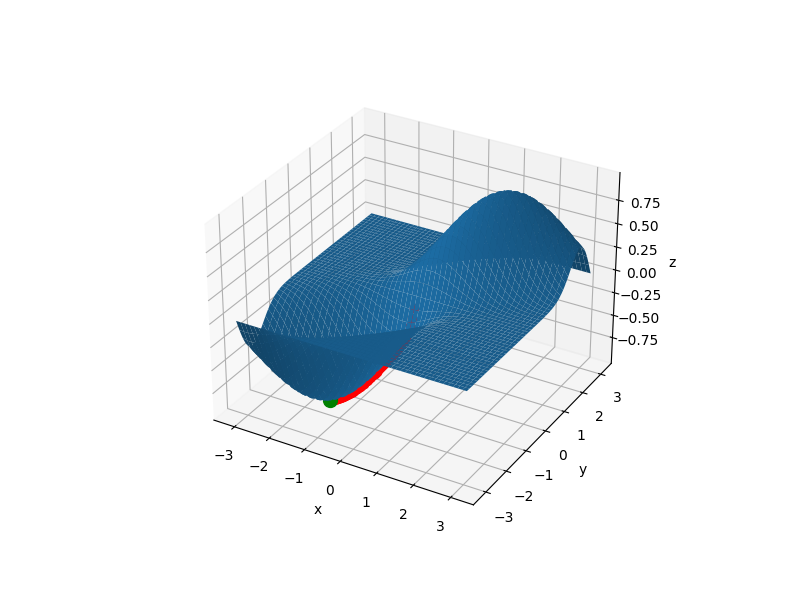

In [17]:
fig3 = plt.figure(figsize = (8,6))           #Created figure
ax3 = fig3.add_subplot(projection = '3d')    #Created 3d axis
x = np.linspace(xlim3[0],xlim3[1],500)       #Created 500 x points
y = np.linspace(-np.pi,np.pi,500)            #Created 500 y points
X, Y = np.meshgrid(x,y)                      #Created mesh having 100 x points and 100 y points X and Y have 100 * 100 points now
Z = np.zeros((500, 500))                     #Create output matrix Z
for i in range(len(x)) :
    for j in range(len(y)) :
        Z[i][j] = f3(X[i][j], Y[i][j])        #Set values of Z 
ax3.set_xlabel('x')                           #Set x axis name
ax3.set_ylabel('y')                           #Set y axis name
ax3.set_zlabel('z')                           #Set z axis name
ax3.plot_surface(X,Y,Z)                       #Plots surface Z = f(X,Y)
xall, yall, zall = [], [], []
lnall,  = ax3.plot([], [], [], 'ro')          #Plots the points that have been checked in red dot
lngood, = ax3.plot([], [], [], 'go', markersize=10) #Plots the current point being checked in green dot
    
def problem3(frame):
    global x03, lr3                           #Load initial starting point and learning rate
    xold = np.array(x03)
    xnew = xold - lr3 * np.array([f3_dx(xold[0],xold[1]), f3_dy(xold[0],xold[1])])#Forward Propagation using Gradient Descent           
    x03 = xnew   #Update next start point
    if xnew[0] >= xlim3[0] and xnew[0] <= xlim3[1]:
        xall.append(xnew[0])
        yall.append(xnew[1])
        zall.append(f3(xnew[0], xnew[1]))
        lnall.set_data_3d(xall, yall, zall) #Plot the red point
        lngood.set_data_3d(xnew[0], xnew[1], f3(xnew[0], xnew[1])) #Plot the green point
        return lngood,

ani3= FuncAnimation(fig3, problem3, frames=range(100), interval=100, repeat=False) #Animation
writervideo = animation.FFMpegWriter(fps=60) #To save the video 
ani3.save('Problem3.mp4', writer=writervideo) #Video of the Gradient Descent Approach
plt.show()

### Additional : Use of widgets to show effect of learning rate
The below cell shows how widgets could be used to show the effect of learning rate on gradient descent in 2D

In [18]:
wdg.interact(gradientdescent2D,f= wdg.fixed(f3), fprimex = wdg.fixed(f3_dx), fprimey = wdg.fixed(f3_dy), x0 = wdg.fixed(x03), xlim = wdg.fixed(xlim3), ylim = wdg.fixed([np.NINF, np.Inf]), learning_rate = wdg.FloatSlider(min=0, max = 1, step = 0.01) )

interactive(children=(FloatSlider(value=0.0, description='learning_rate', max=1.0, step=0.01), FloatSlider(val…

<function __main__.gradientdescent2D(f, fprimex, fprimey, x0, xlim, ylim, learning_rate, tolerance=1e-06, itermax=1000000.0)>

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

In [19]:
def f4(x):   #Function definition
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

def df4dx(x):#Derivative definition
    return -4*(cos(x)**3)*(sin(x)) - 3*(sin(x)**2)*(cos(x)) - 8*sin(x)*cos(x) - sin(x)

xlim4 = [0, 2*np.pi] #Set limits
x04 = np.pi-0.1      #Initial value
lr4 = 0.1            #Set learning rate

x4, y4 = gradientdescent(f4, df4dx, xlim4, x04, lr4) #Get optimal solution

In [20]:
print(f"The function is having a minima at x = {x4} and its value is y = {y4}")

The function is having a minima at x = 1.6616601676310974 and its value is y = -4.045412051570274


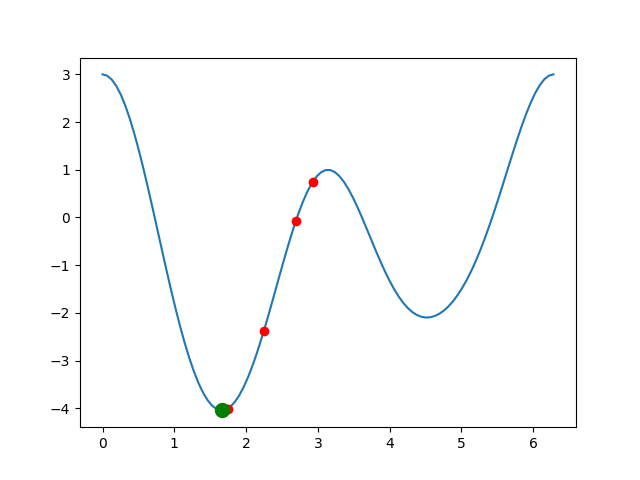

In [21]:
xbase4 = np.linspace(0,2*np.pi, 100)   #Get points for plotting f4
ybase4 = f4(xbase4)                    #Get points for plotting f4
fig4, ax4 = plt.subplots()
ax4.plot(xbase4, ybase4)               #Plot f4(x)
xall, yall = [], []
lnall,  = ax4.plot([], [], 'ro')       #To mark all visited points
lngood, = ax4.plot([], [], 'go', markersize=10) #To mark the current optimal point
bestx = x04
bestcost = f4(x04)

def problem4(frame):
    global bestcost, bestx, lr4
    x = bestx - df4dx(bestx) * lr4      #1D Gradient Descent
    bestx = x                           #Update x
    y = f4(x)                           #Update y
    lngood.set_data(x, y)               #Mark current point in green
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)          #Mark all points visited in red
    return lngood,

ani4= FuncAnimation(fig4, problem4, frames=range(100), interval=1000, repeat=False) #Animation
writervideo = animation.FFMpegWriter(fps=60) #To save the video 
ani4.save('Problem4.mp4', writer=writervideo) #Video of the Gradient Descent Approach
plt.show()

### Additional : Widgets to show effect of xo and learning_rate on gradient descent
The below cell shows the effect of learning_rate and xo on the gradient descent algorithm

In [22]:
wdg.interact(gradientdescent, f = wdg.fixed(f4), fprime = wdg.fixed(df4dx), xlim = wdg.fixed(xlim4), xo = wdg.FloatSlider(min = xlim4[0], max = xlim4[1], step = 0.01), learning_rate = wdg.FloatSlider(min = 0, max = 1, step = 0.01))

interactive(children=(FloatSlider(value=0.0, description='xo', max=6.283185307179586, step=0.01), FloatSlider(…

<function __main__.gradientdescent(f, fprime, xlim, xo, learning_rate, tolerance=1e-06, itermax=1000000.0)>

## Alternate Approach using scipy.optimize

scipy comes with an excellent optimization library called scipy.optimize, the scipy.optimize.minimize is a function that takes in input, the function to be minimized, the initial guess, and we get the output ! 

The output contains a lot of information - most importantly, the minima point x and the minimum value are also given as output. This also works on gradient descent primarily, but has several other methods which could be used using the method attribute of the function scipy.optimize.minimize()

In [23]:
import scipy.optimize as sp

In [24]:
#Redefining functions for scipy.optimize.minimize usage
def f1(x):                       
    return x ** 2 + 3 * x + 8

def f2(xl):     
    x,y = xl[0], xl[1]
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def f3(xl):   
    x,y = xl[0], xl[1]
    return exp(-(x - y)**2)*sin(y)

def f4(x):   
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

In [25]:
sp.minimize(f1, x01)

      fun: 5.750000000000094
 hess_inv: array([[0.49999997]])
      jac: array([6.55651093e-07])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([-1.49999969])

In [26]:
sp.minimize(f2, (6,3) , bounds = ((-10,10), (-10,10)))

      fun: 2.000000010230792
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.        , 0.00017621])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 78
      nit: 18
     njev: 26
   status: 0
  success: True
        x: array([3.99294953, 2.00008809])

In [27]:
sp.minimize(f3, (0,0) , bounds = ((-np.pi,np.pi), (None,0)))

      fun: -0.9999999999989078
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.99200728e-07, 3.33066909e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 33
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([-1.57079453, -1.57079502])

In [28]:
sp.minimize(f4, np.pi-0.1)

      fun: -4.04541205157245
 hess_inv: array([[0.09128028]])
      jac: array([1.54972076e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([1.66166095])